In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import helpfunction as helper
from __future__ import division

Welcome to JupyROOT 6.10/08


In [3]:
#inputdir = '/home/tmettler/Desktop/ub_data/ub_xsec/ConsolidatedSliceAnalyser/ext/'

# CRTinBNB tagger, Overlay or MC

In [4]:
fidvol_vtx = [10,10,10,10,10,50] 
fidvol_end = [5,5,5,5,5,5]

lower = [-1.55, -115.53, 0.1]
upper = [254.8, 117.47, 1036.9]


mass_mu = 0.106
kin_min = 0.02
kin_min_mu = kin_min + mass_mu

gr = (1 + 5 ** 0.5) / 2

In [5]:
def eventHash(df):
    return df.apply(lambda x: hash(tuple(x)), axis = 1)

def inTPC_mask(df, str_x, str_y, str_z, fidvol=[0]*6):
    global upper, lower
    mask_x = df[str_x].between(lower[0]+fidvol[0], upper[0]-fidvol[1])
    mask_y = df[str_y].between(lower[1]+fidvol[2], upper[1]-fidvol[3])
    mask_z = df[str_z].between(lower[2]+fidvol[4], upper[2]-fidvol[5])
    mask = mask_x & mask_y & mask_z
    return mask

def inTPC_df(df, str_x, str_y, str_z, fidvol=[0]*6):
    mask = inTPC_mask(df, str_x, str_y, str_z, fidvol)
    return df[mask]

In [22]:
inputdir = '/home/tmettler/Desktop/ub_data/cc_filter/data_numu/'
outputdir = '/home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/'

try:
    os.stat(outputdir)
except:
    os.mkdir(outputdir)

filename = 'NuCCana_1_QP_allTracks.root' 

isMC = 1

In [23]:
test = ROOT.TChain("NuCCana/event","event")
test.Add( inputdir + filename)

#test.ls()
print "Number of Entries:", test.GetEntries()
# uncomment one of them
cutname = 'has_nuslice'

cut = ' && ' + cutname
#cut = ''

title_cut = ''
if(cut!=''):
    title_cut = ' with '+ cutname
    

Number of Entries: 15718


In [8]:
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("","",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x3 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/track_length.png has been created


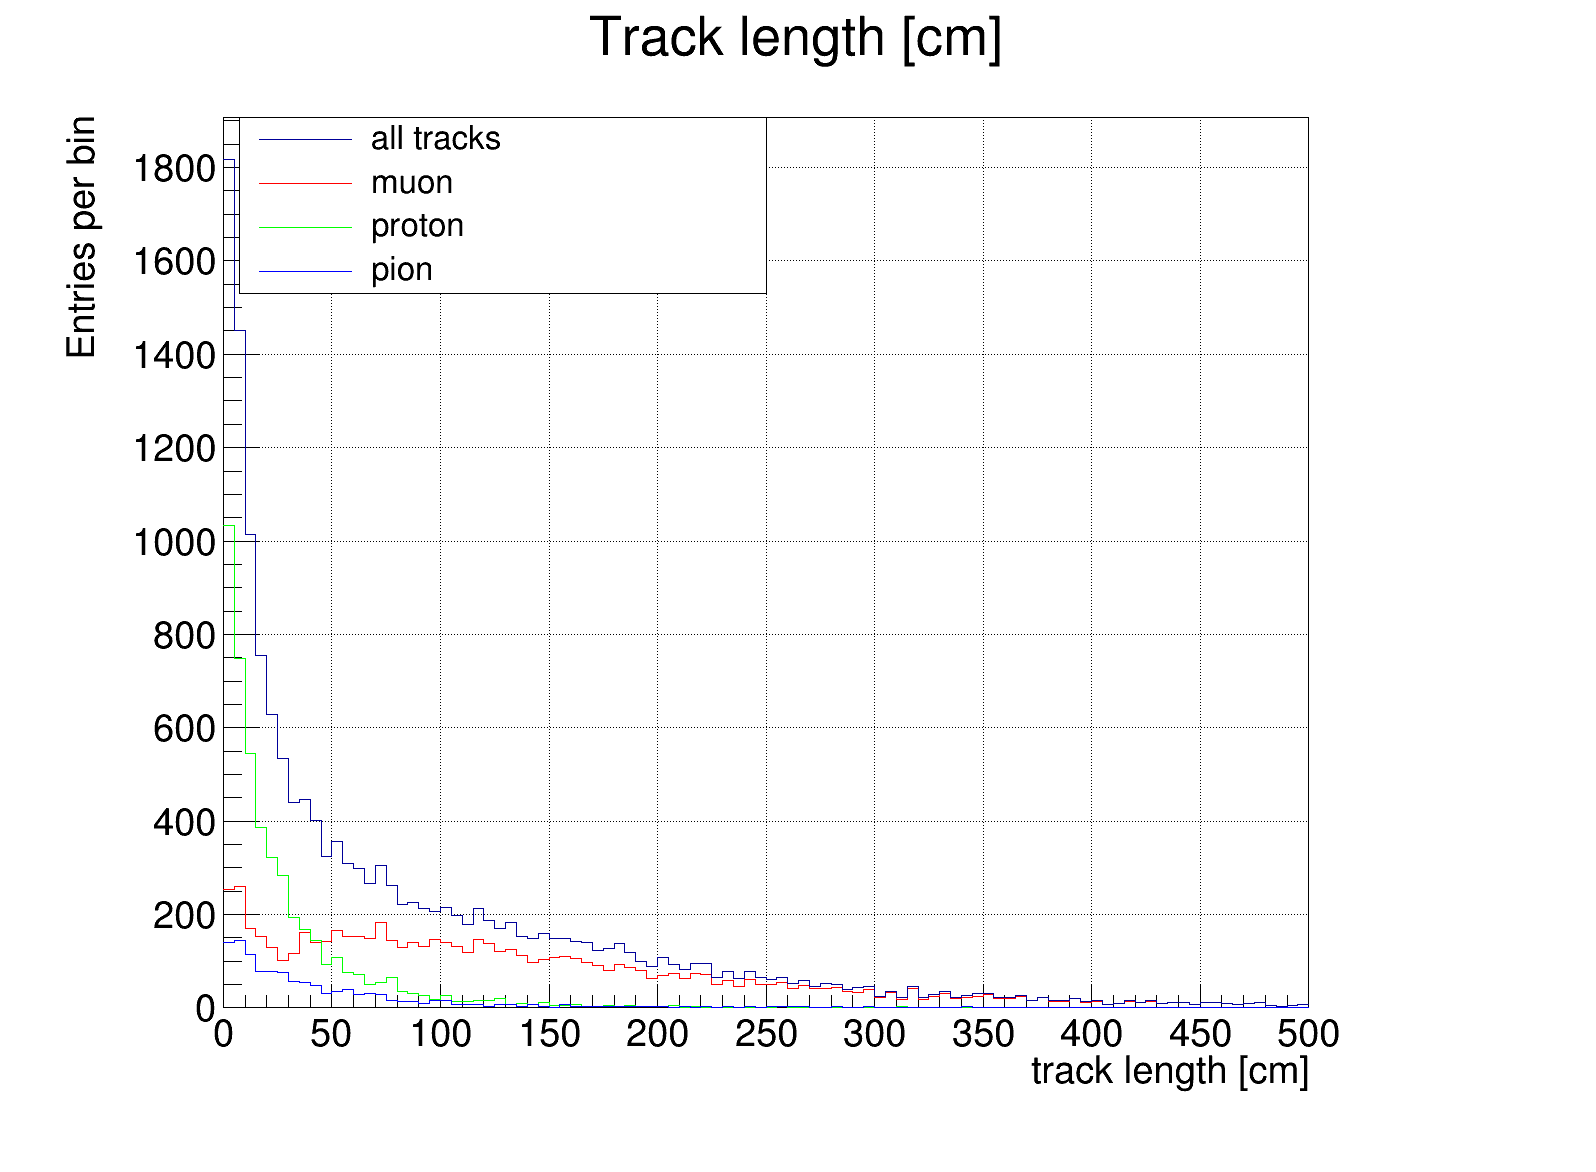

In [26]:
# generate Vertex x position plot
tracklength = ' '
h_x = ROOT.TH1F("h_x","Track length [cm]",100,0,500)
h_x1 = ROOT.TH1F("h_x1","Track length [cm]",100,0,500)
h_x2 = ROOT.TH1F("h_x2","Track length [cm]",100,0,500)
h_x3 = ROOT.TH1F("h_x3","Track length [cm]",100,0,500)


test.Draw('TrackLength>>h_x','1' + tracklength)
test.Draw('TrackLength>>h_x1','MCle_PDG==13' + tracklength)
test.Draw('TrackLength>>h_x2','MCle_PDG==2212' + tracklength)
test.Draw('TrackLength>>h_x3','MCle_PDG==211' + tracklength)
h_x1.SetLineColorAlpha(2, 1);
h_x2.SetLineColorAlpha(3, 1);
h_x3.SetLineColorAlpha(4, 1);
h_x.SetXTitle("track length [cm]");
h_x.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_x,"all tracks","l");
legend.AddEntry(h_x1,"muon","l");
legend.AddEntry(h_x2,"proton","l");
legend.AddEntry(h_x3,"pion","l");
#h_x.SetStats(1);
h_x.Draw();
h_x1.Draw("same");
h_x2.Draw("same");
h_x3.Draw("same");
legend.Draw();
h_x.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "track_length.png");

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x3 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/track_length.png has been created


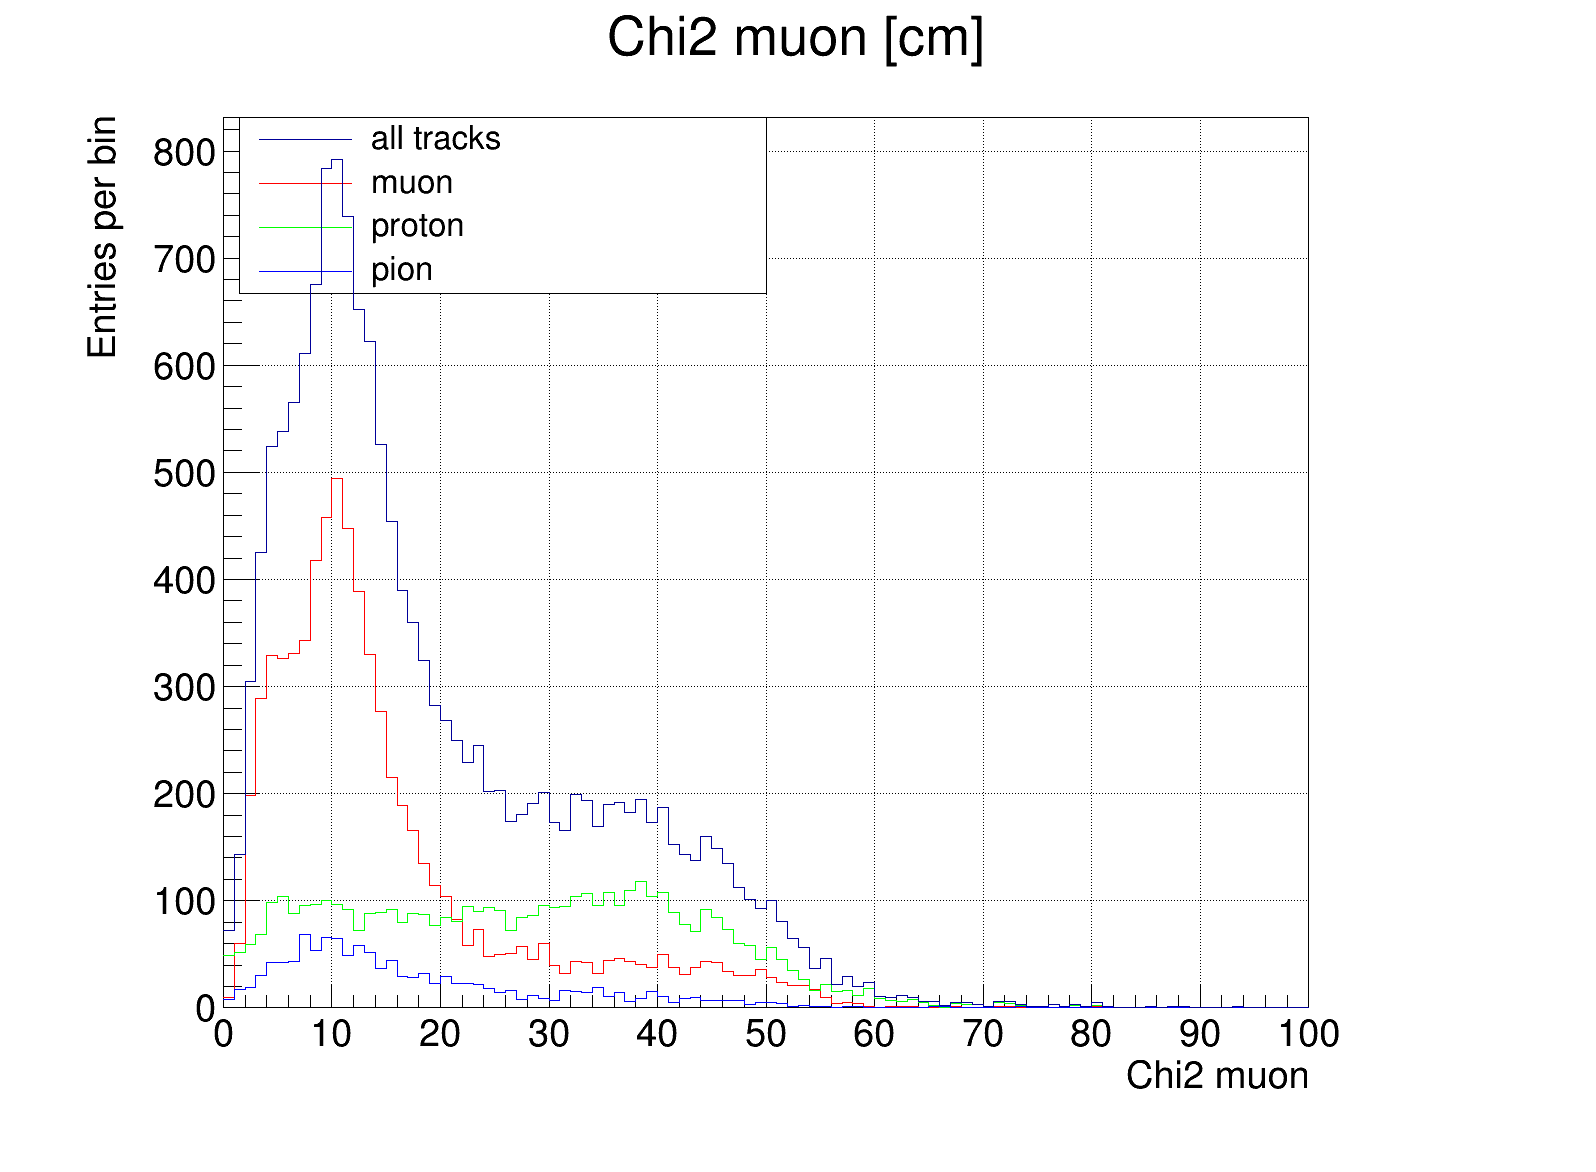

In [31]:
# generate Vertex x position plot
tracklength = ' '
bins = 100
upper = 100
under = 0
h_x = ROOT.TH1F("h_x","Chi2 muon [cm]",bins,under,upper)
h_x1 = ROOT.TH1F("h_x1","Track length [cm]",bins,under,upper)
h_x2 = ROOT.TH1F("h_x2","Track length [cm]",bins,under,upper)
h_x3 = ROOT.TH1F("h_x3","Track length [cm]",bins,under,upper)

variable = 'TrackPID_chimuon'

test.Draw(variable+'>>h_x','1' + tracklength)
test.Draw(variable+'>>h_x1','MCle_PDG==13' + tracklength)
test.Draw(variable+'>>h_x2','MCle_PDG==2212' + tracklength)
test.Draw(variable+'>>h_x3','MCle_PDG==211' + tracklength)
h_x1.SetLineColorAlpha(2, 1);
h_x2.SetLineColorAlpha(3, 1);
h_x3.SetLineColorAlpha(4, 1);
h_x.SetXTitle("Chi2 muon");
h_x.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_x,"all tracks","l");
legend.AddEntry(h_x1,"muon","l");
legend.AddEntry(h_x2,"proton","l");
legend.AddEntry(h_x3,"pion","l");
#h_x.SetStats(1);
h_x.Draw();
h_x1.Draw("same");
h_x2.Draw("same");
h_x3.Draw("same");
legend.Draw();
h_x.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "chimuon.png");

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/chimuonproton.png has been created


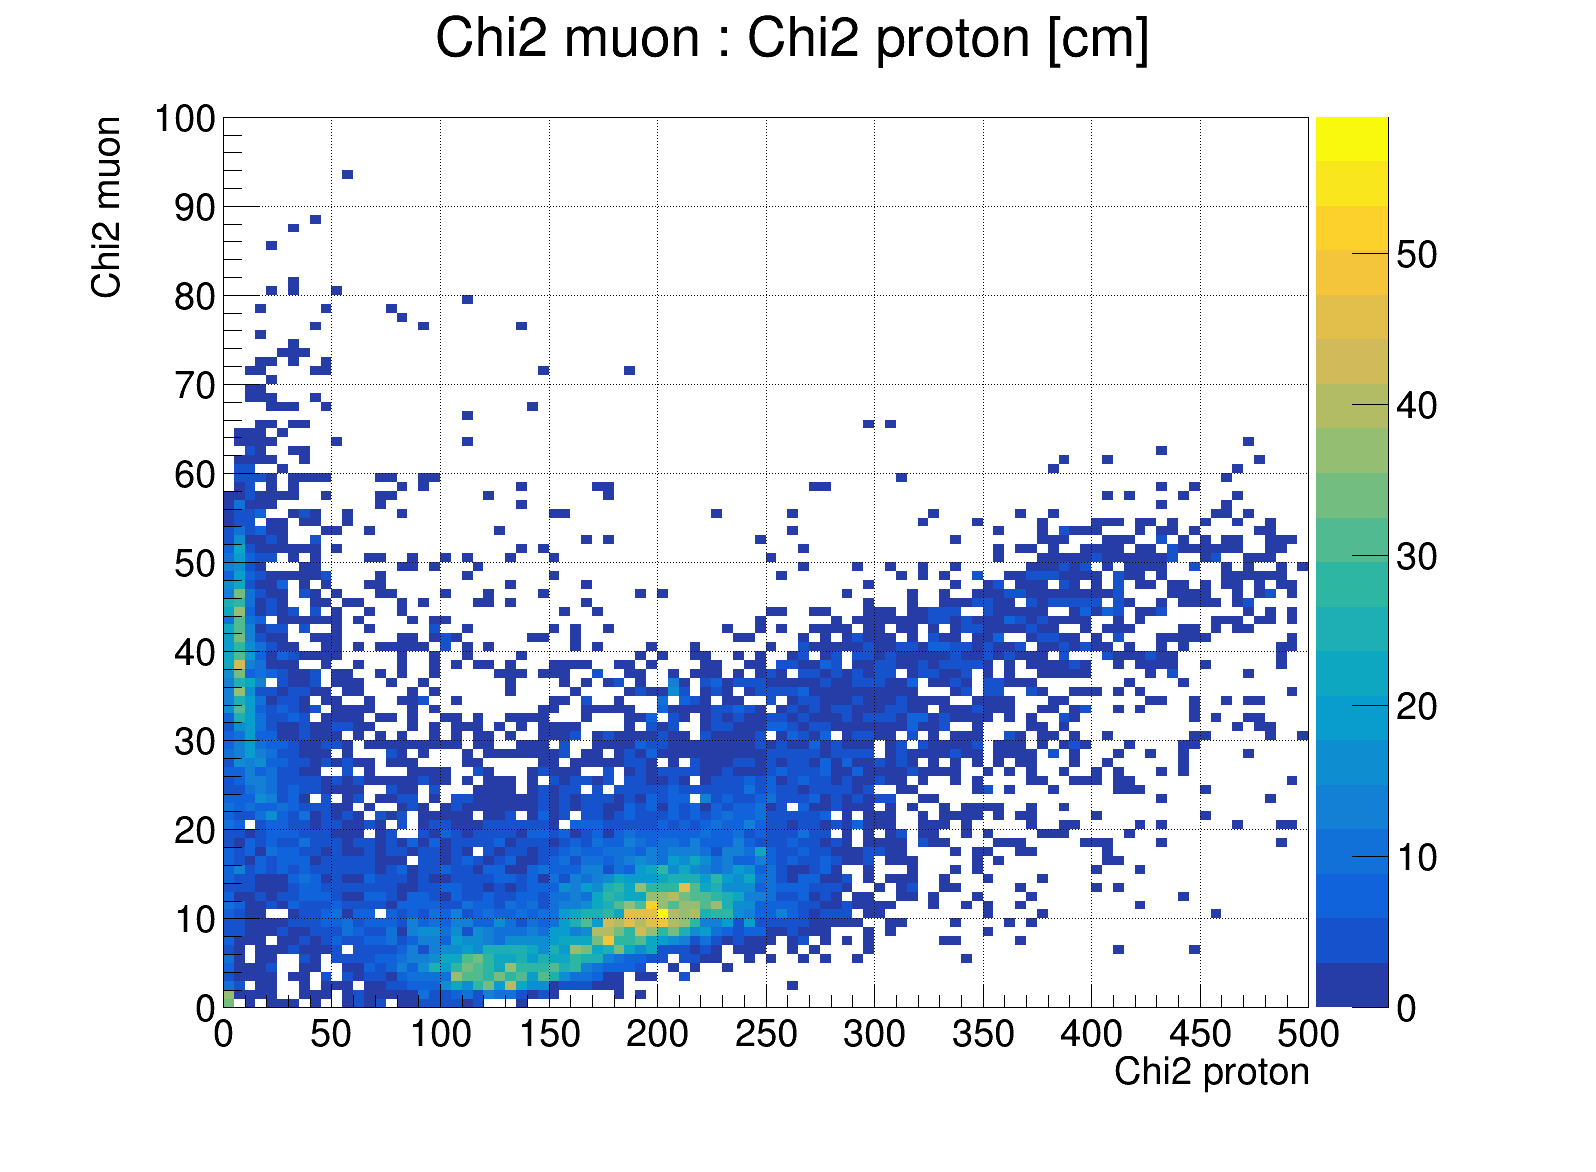

In [40]:
tracklength = ' '
binsX = 100
upperX = 500
underX = 0
binsY = 100
upperY = 100
underY = 0

h_x = ROOT.TH2F("h_x","Chi2 muon : Chi2 proton all",binsX,underX,upperX,binsY,underY,upperY)
variableX = 'TrackPID_chimuon'
variableY = 'TrackPID_chiproton'

test.Draw(variableX+':'+variableY+'>>h_x','1' + tracklength)
h_x.SetXTitle("Chi2 proton");
h_x.SetYTitle("Chi2 muon");

#h_x.SetStats(1);
h_x.Draw('colz');


c1.Draw()
c1.SaveAs(outputdir + "chimuonprotonAll.png");


Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/chimuonprotonMuon.png has been created


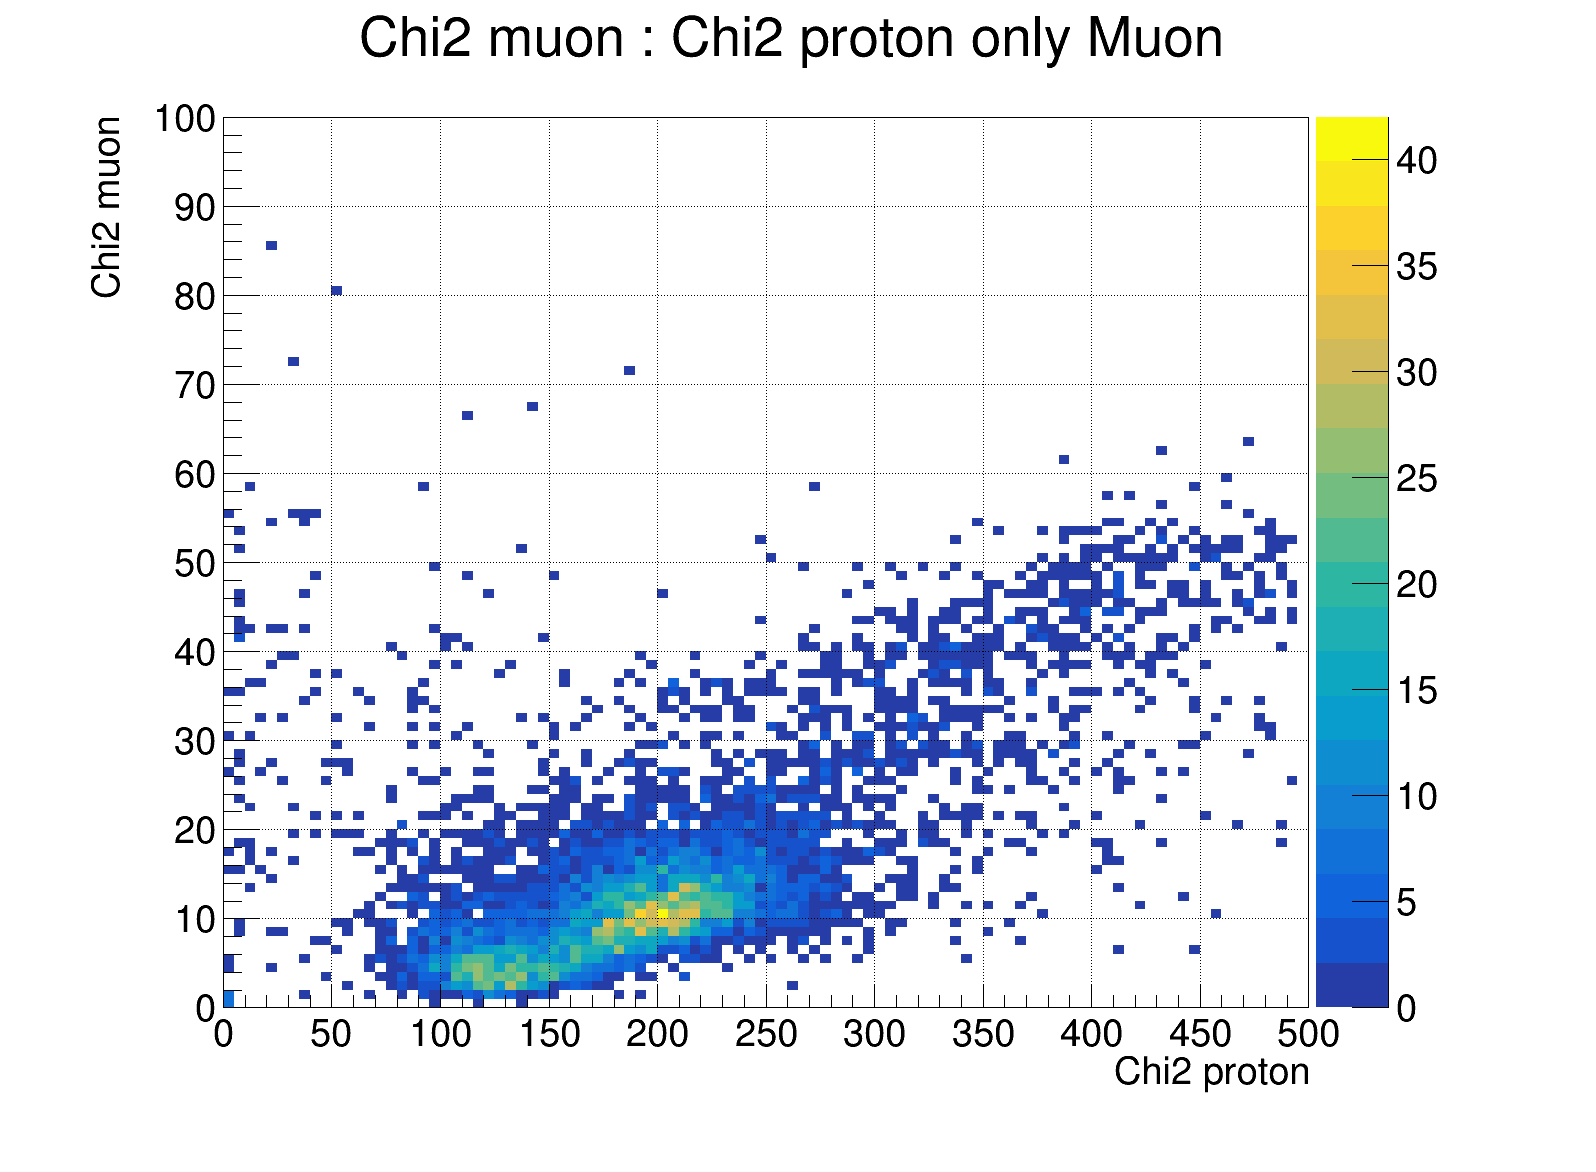

In [41]:
tracklength = ' '
binsX = 100
upperX = 500
underX = 0
binsY = 100
upperY = 100
underY = 0

h_x = ROOT.TH2F("h_x","Chi2 muon : Chi2 proton only Muon",binsX,underX,upperX,binsY,underY,upperY)
variableX = 'TrackPID_chimuon'
variableY = 'TrackPID_chiproton'

test.Draw(variableX+':'+variableY+'>>h_x','MCle_PDG==13' + tracklength)
h_x.SetXTitle("Chi2 proton");
h_x.SetYTitle("Chi2 muon");

#h_x.SetStats(1);
h_x.Draw('colz');


c1.Draw()
c1.SaveAs(outputdir + "chimuonprotonMuon.png");

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/chimuonprotonNoMuon.png has been created


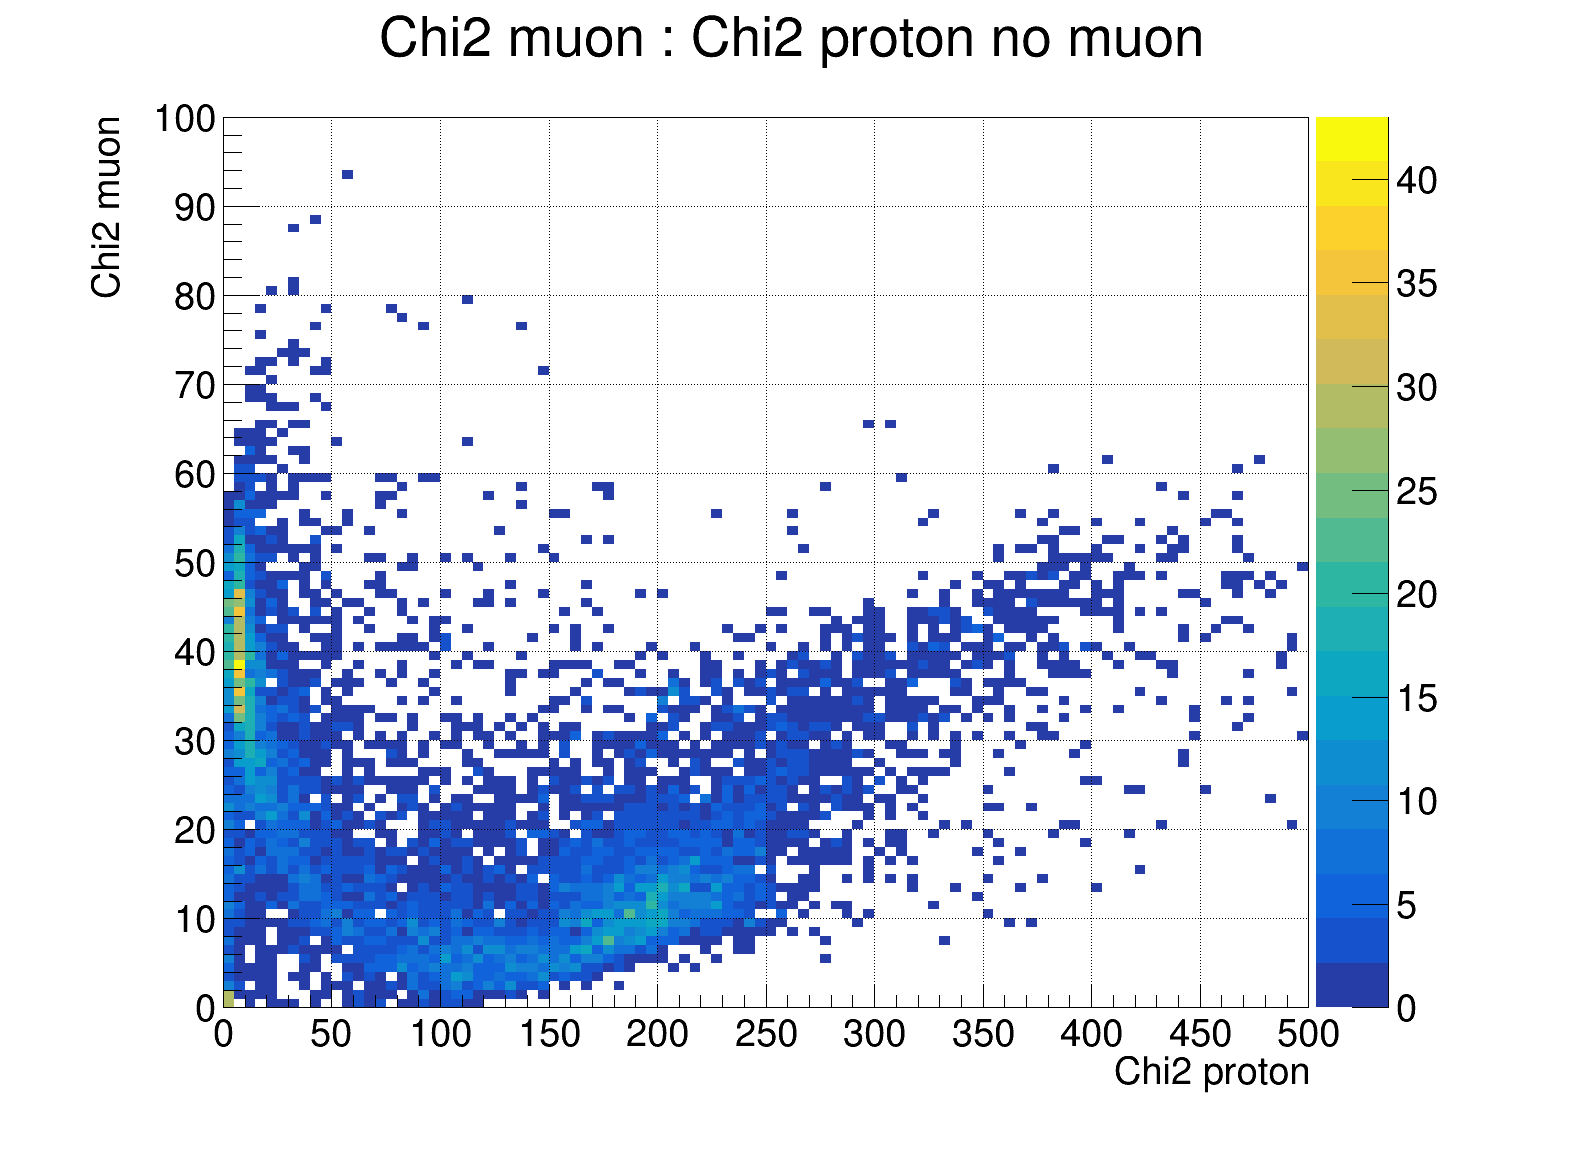

In [42]:
tracklength = ' '
binsX = 100
upperX = 500
underX = 0
binsY = 100
upperY = 100
underY = 0

h_x = ROOT.TH2F("h_x","Chi2 muon : Chi2 proton no muon",binsX,underX,upperX,binsY,underY,upperY)
variableX = 'TrackPID_chimuon'
variableY = 'TrackPID_chiproton'

test.Draw(variableX+':'+variableY+'>>h_x','MCle_PDG!=13' + tracklength)
h_x.SetXTitle("Chi2 proton");
h_x.SetYTitle("Chi2 muon");

#h_x.SetStats(1);
h_x.Draw('colz');


c1.Draw()
c1.SaveAs(outputdir + "chimuonprotonNoMuon.png");

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/chimuonprotonProton.png has been created


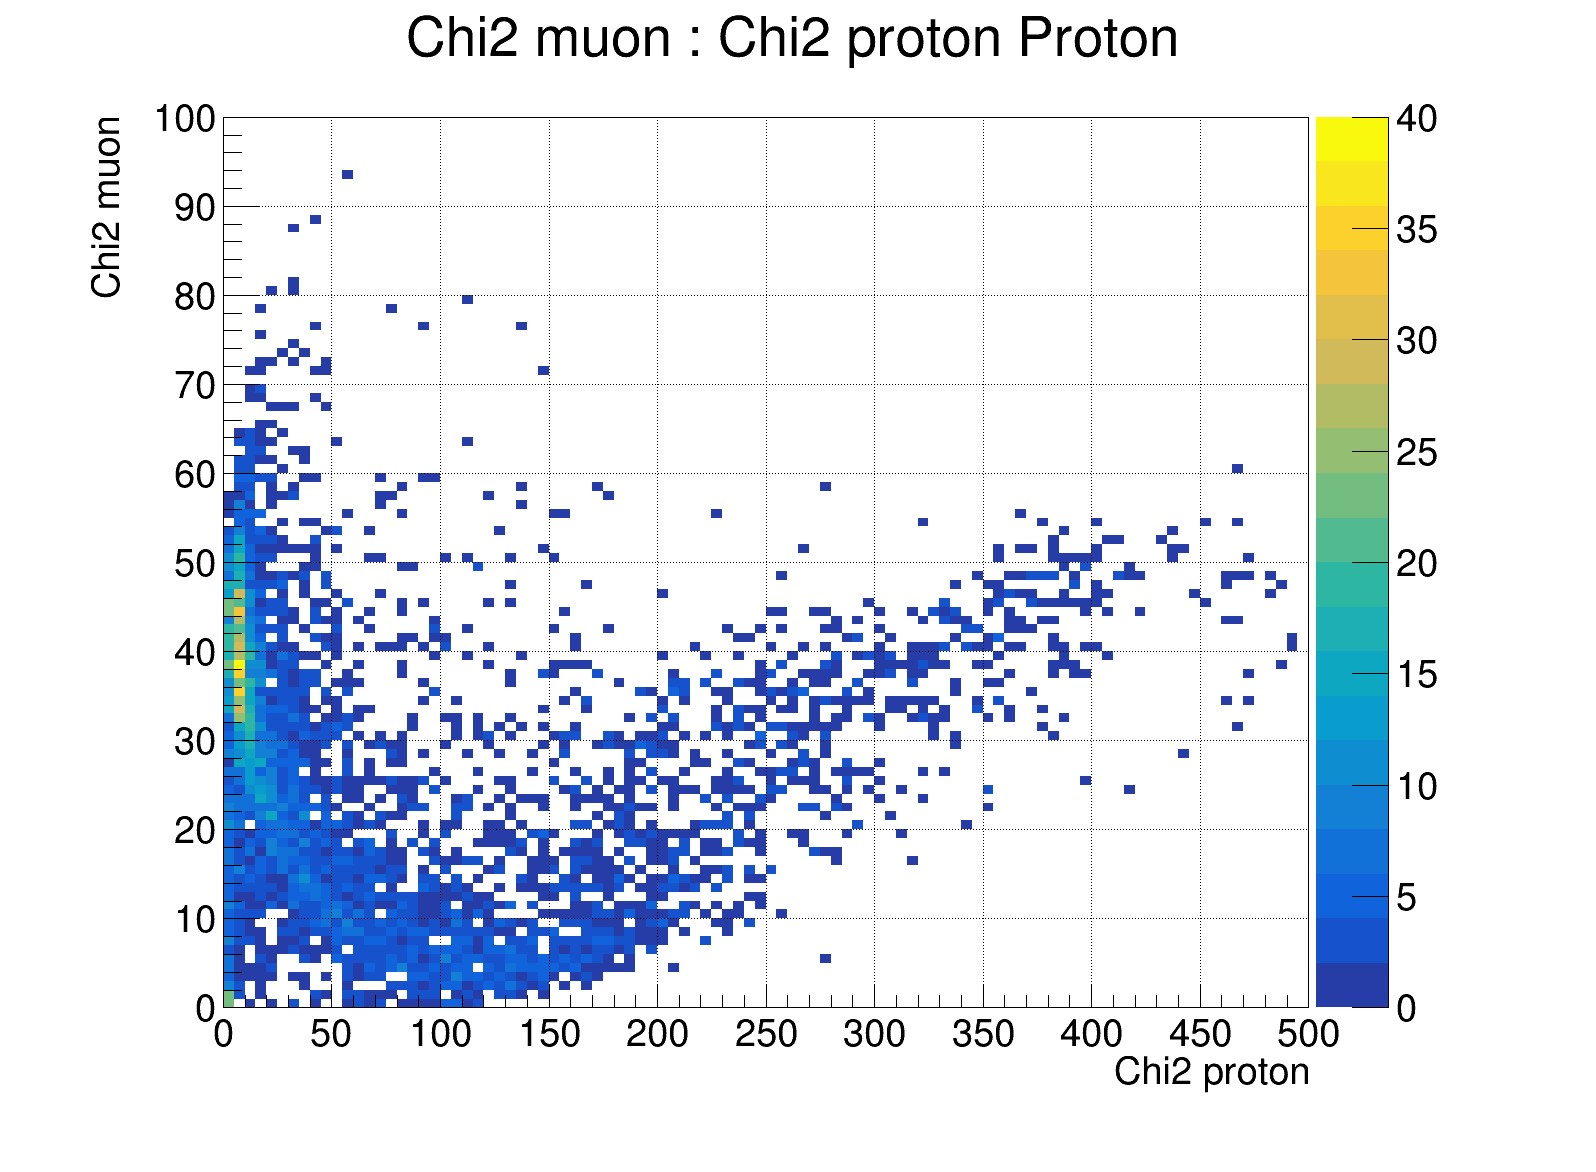

In [46]:
tracklength = ' '
binsX = 100
upperX = 500
underX = 0
binsY = 100
upperY = 100
underY = 0

h_x = ROOT.TH2F("h_x","Chi2 muon : Chi2 proton Proton",binsX,underX,upperX,binsY,underY,upperY)
variableX = 'TrackPID_chimuon'
variableY = 'TrackPID_chiproton'

test.Draw(variableX+':'+variableY+'>>h_x','MCle_PDG==2212' + tracklength)
h_x.SetXTitle("Chi2 proton");
h_x.SetYTitle("Chi2 muon");

#h_x.SetStats(1);
h_x.Draw('colz');


c1.Draw()
c1.SaveAs(outputdir + "chimuonprotonProton.png");

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/chimuonpionAll.png has been created


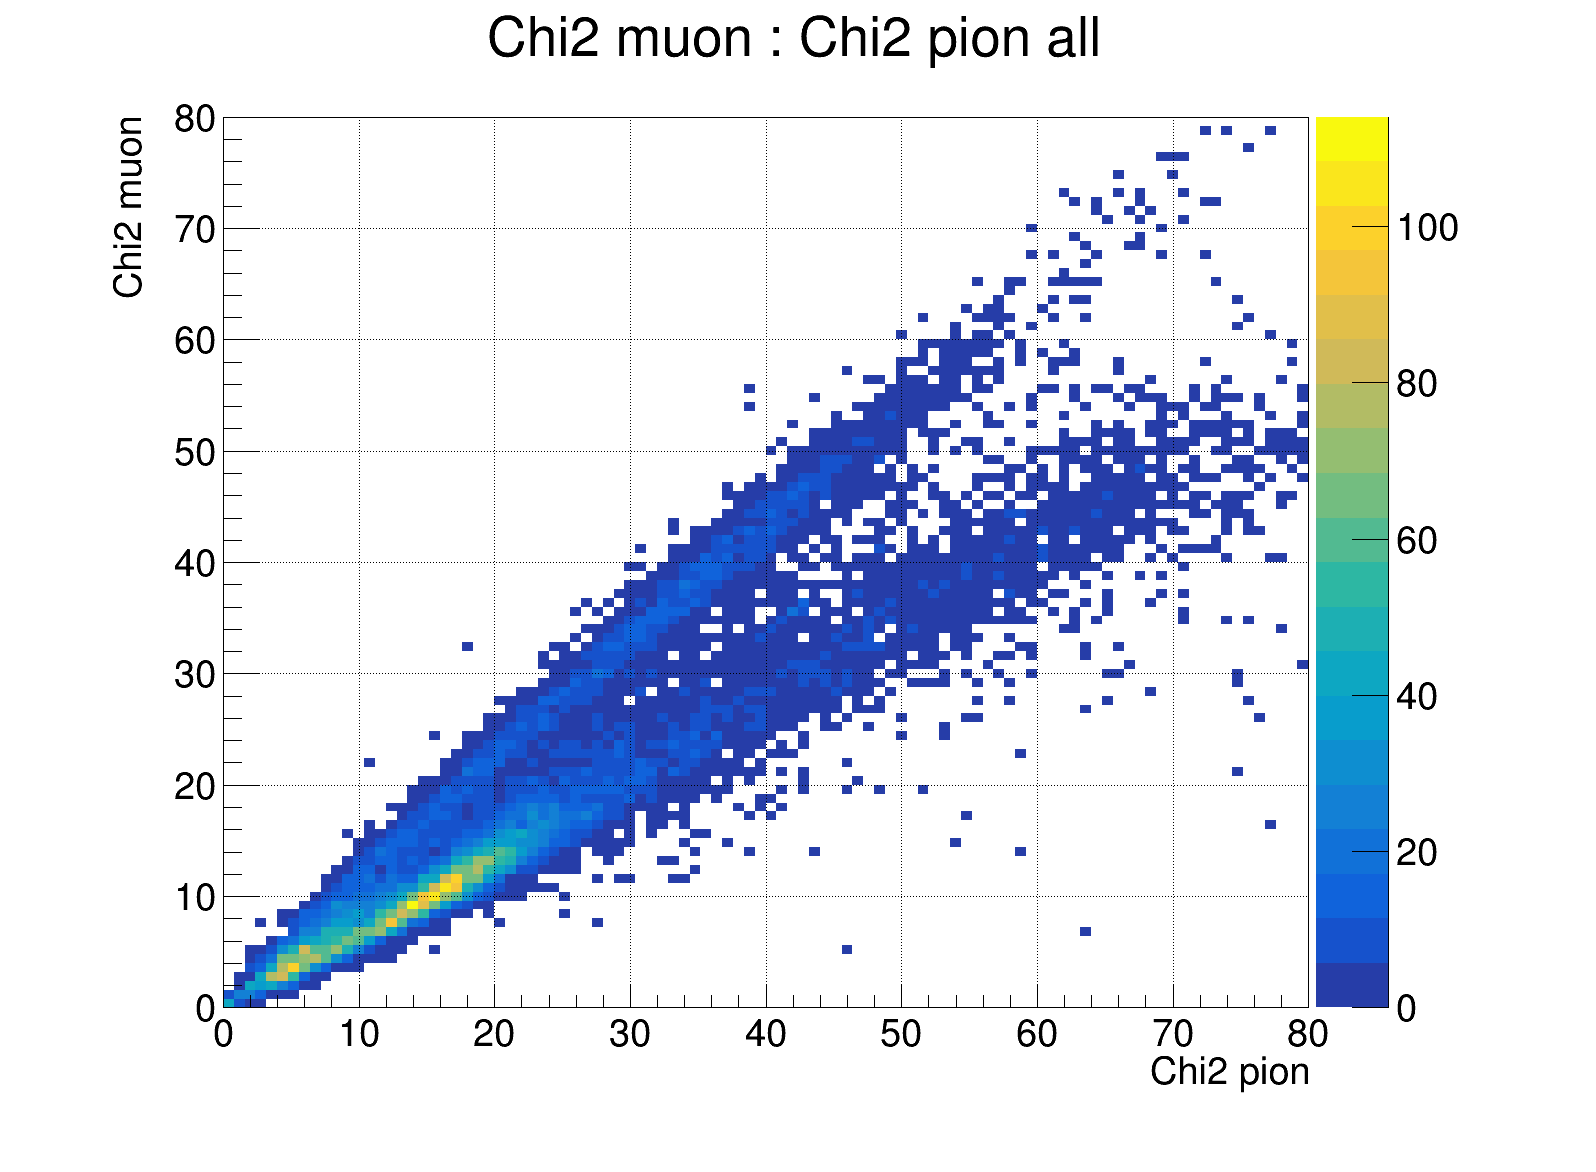

In [43]:
tracklength = ' '
binsX = 100
upperX = 80
underX = 0
binsY = 100
upperY = 80
underY = 0

h_x = ROOT.TH2F("h_x","Chi2 muon : Chi2 pion all",binsX,underX,upperX,binsY,underY,upperY)
variableX = 'TrackPID_chimuon'
variableY = 'TrackPID_chipion'

test.Draw(variableX+':'+variableY+'>>h_x','1' + tracklength)
h_x.SetXTitle("Chi2 pion");
h_x.SetYTitle("Chi2 muon");

#h_x.SetStats(1);
h_x.Draw('colz');


c1.Draw()
c1.SaveAs(outputdir + "chimuonpionAll.png");

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/chimuonpionMuon.png has been created


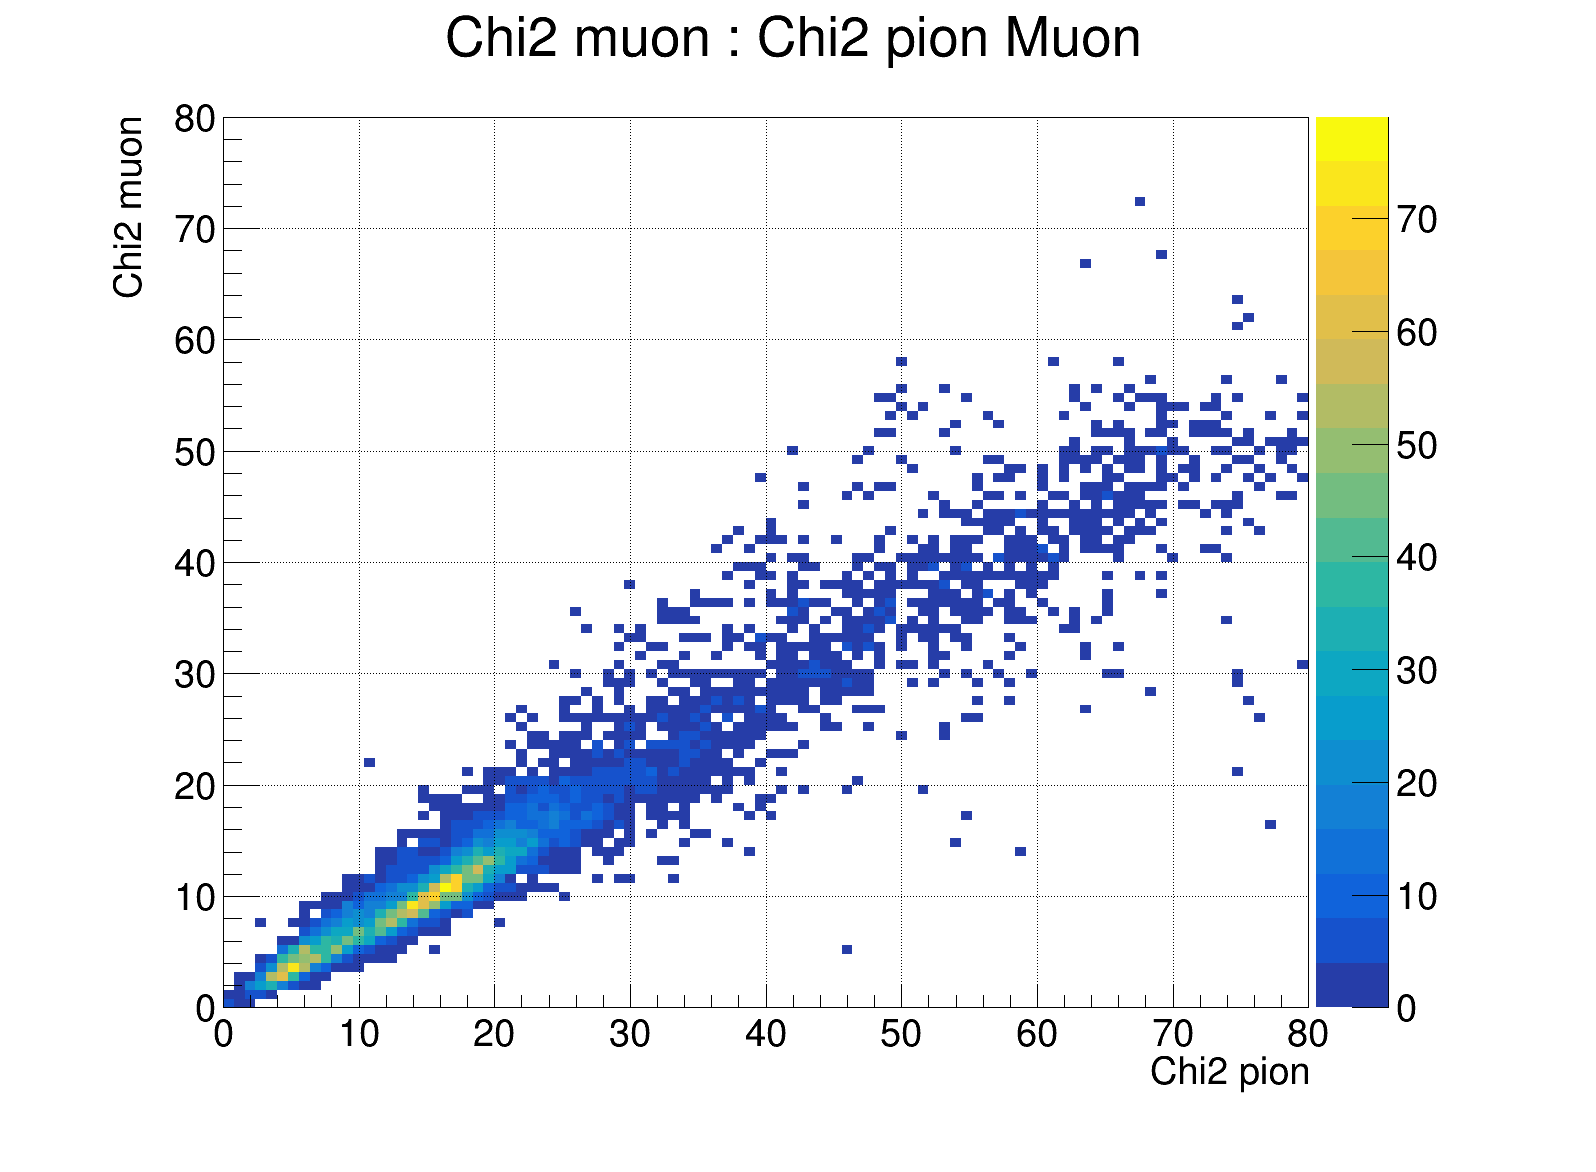

In [44]:
tracklength = ' '
binsX = 100
upperX = 80
underX = 0
binsY = 100
upperY = 80
underY = 0

h_x = ROOT.TH2F("h_x","Chi2 muon : Chi2 pion Muon",binsX,underX,upperX,binsY,underY,upperY)
variableX = 'TrackPID_chimuon'
variableY = 'TrackPID_chipion'

test.Draw(variableX+':'+variableY+'>>h_x','MCle_PDG==13' + tracklength)
h_x.SetXTitle("Chi2 pion");
h_x.SetYTitle("Chi2 muon");

#h_x.SetStats(1);
h_x.Draw('colz');


c1.Draw()
c1.SaveAs(outputdir + "chimuonpionMuon.png");

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/chimuonpionNoMuon.png has been created


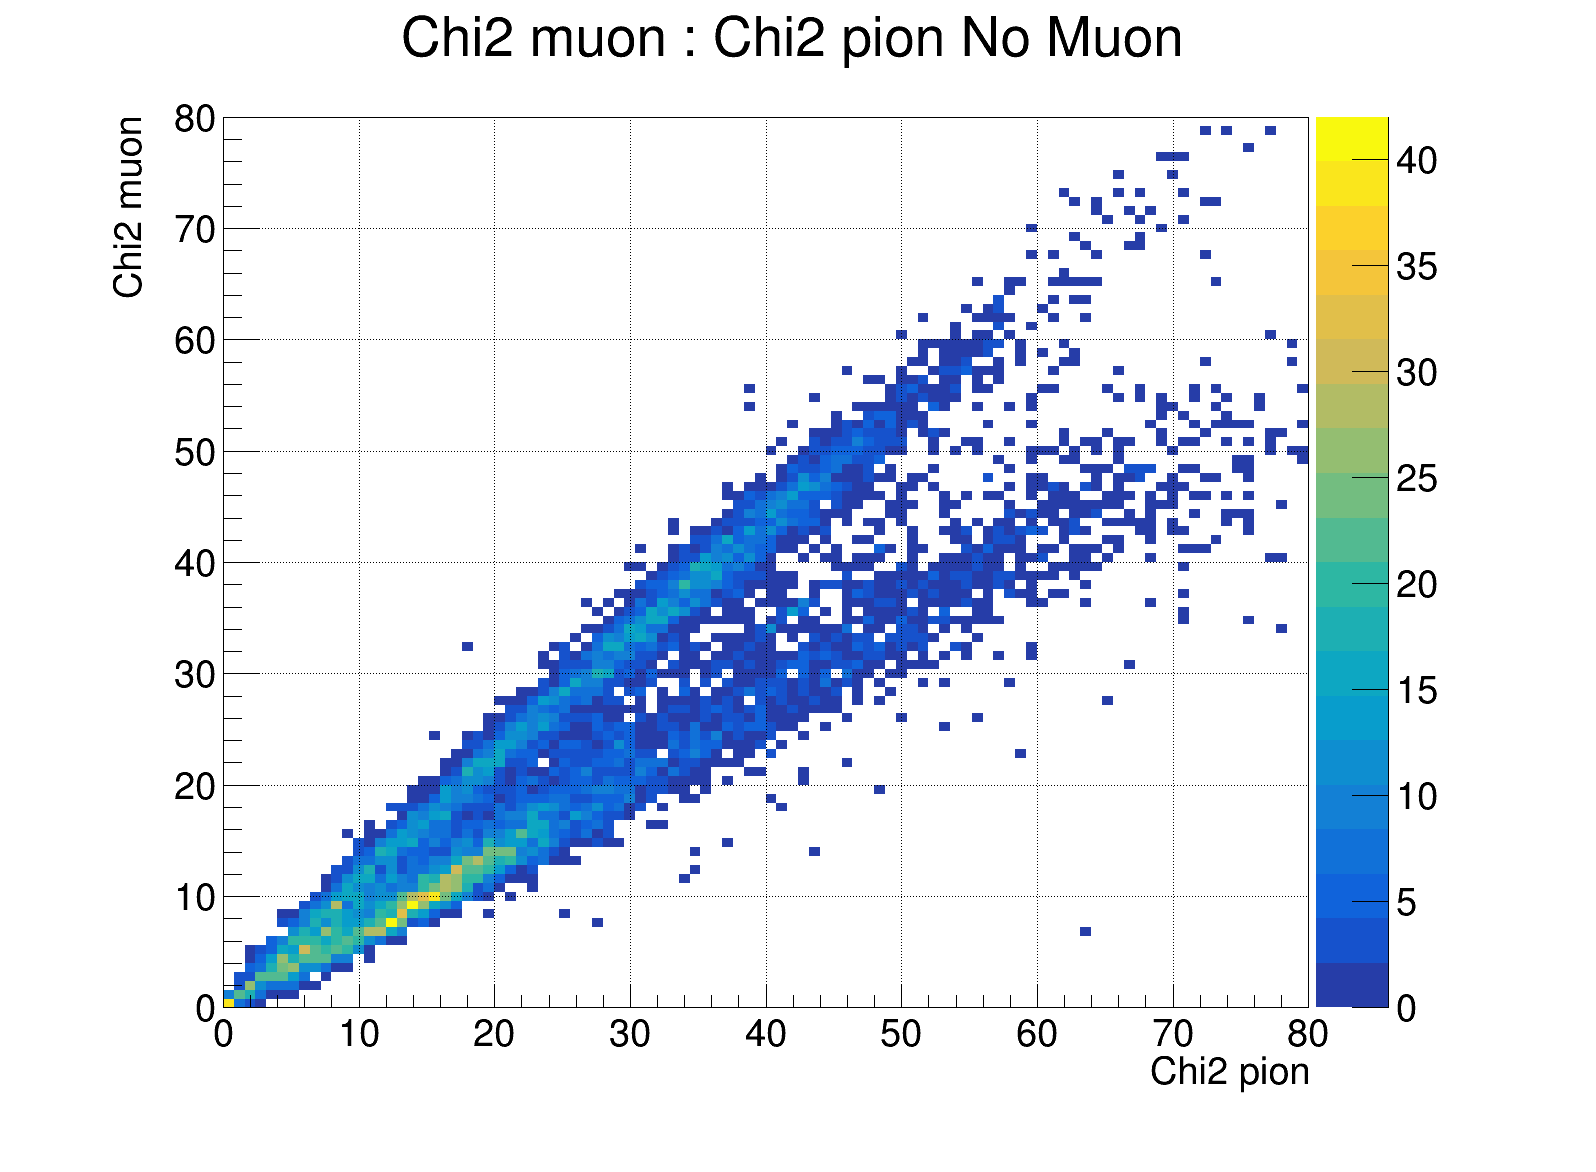

In [45]:
tracklength = ' '
binsX = 100
upperX = 80
underX = 0
binsY = 100
upperY = 80
underY = 0

h_x = ROOT.TH2F("h_x","Chi2 muon : Chi2 pion No Muon",binsX,underX,upperX,binsY,underY,upperY)
variableX = 'TrackPID_chimuon'
variableY = 'TrackPID_chipion'

test.Draw(variableX+':'+variableY+'>>h_x','MCle_PDG!=13' + tracklength)
h_x.SetXTitle("Chi2 pion");
h_x.SetYTitle("Chi2 muon");

#h_x.SetStats(1);
h_x.Draw('colz');


c1.Draw()
c1.SaveAs(outputdir + "chimuonpionNoMuon.png");

Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/cc_filter/data_numu/plots/chimuonpionPion.png has been created


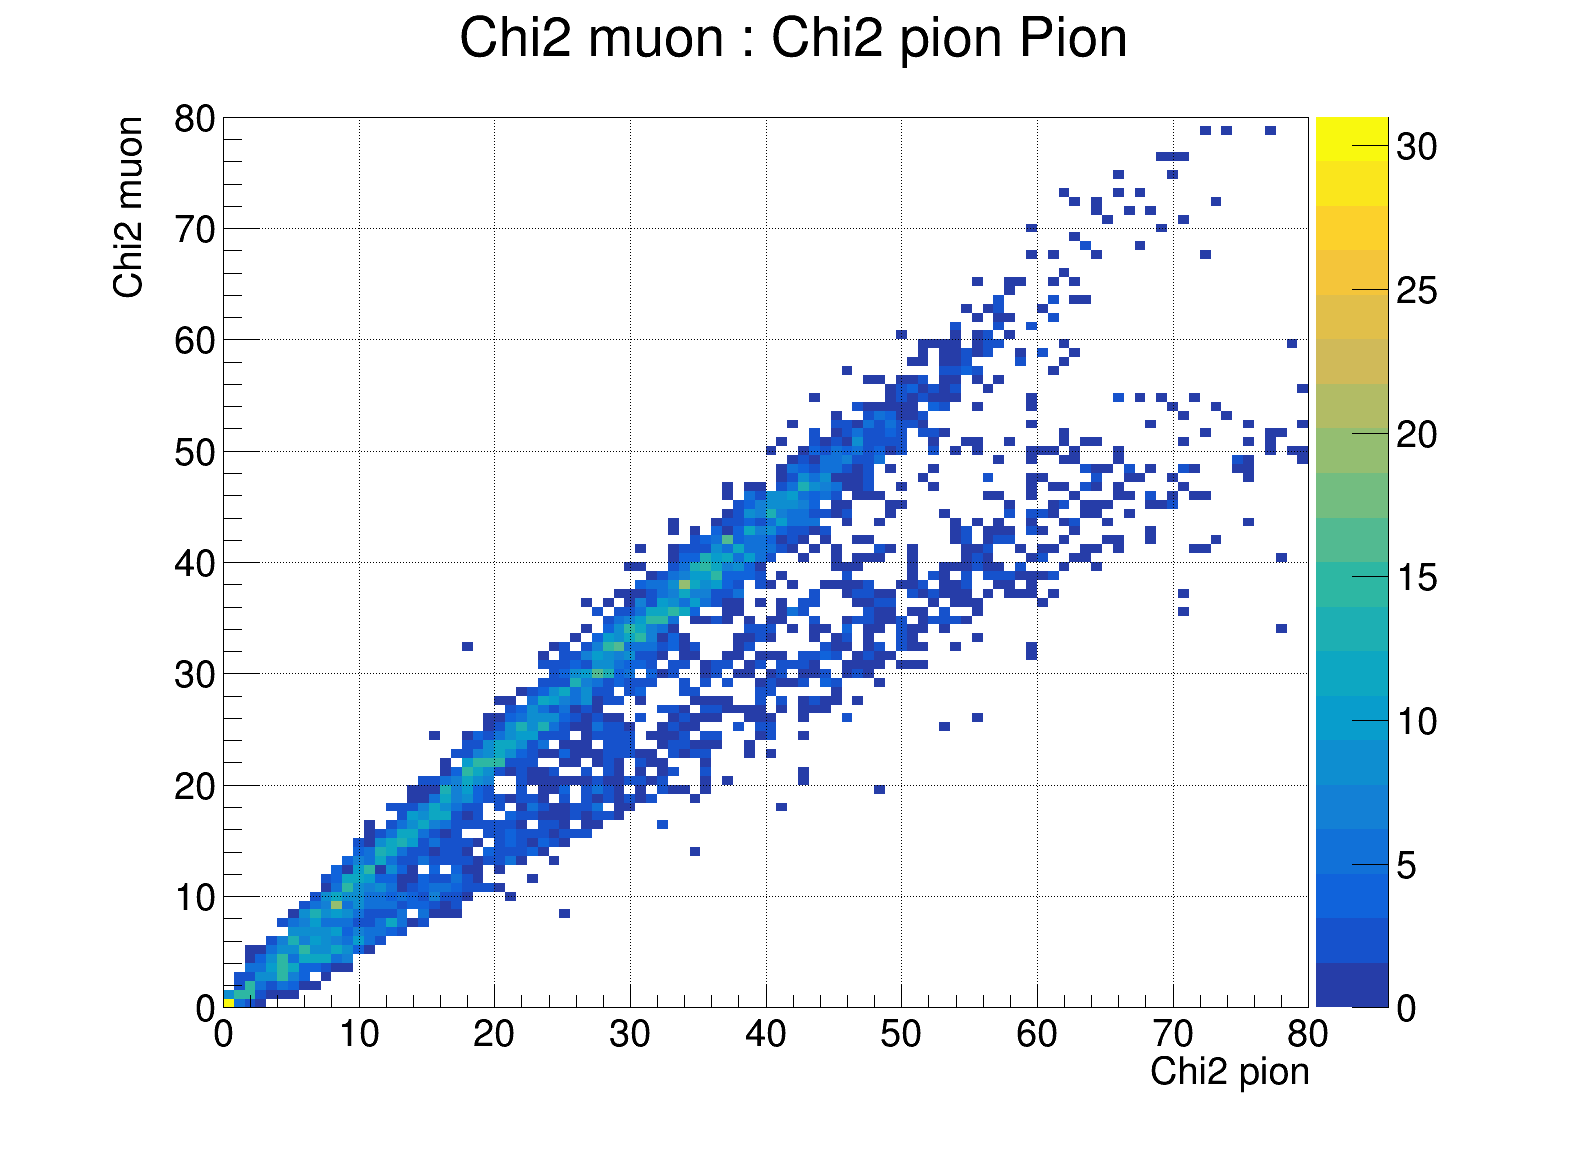

In [47]:
tracklength = ' '
binsX = 100
upperX = 80
underX = 0
binsY = 100
upperY = 80
underY = 0

h_x = ROOT.TH2F("h_x","Chi2 muon : Chi2 pion Pion",binsX,underX,upperX,binsY,underY,upperY)
variableX = 'TrackPID_chimuon'
variableY = 'TrackPID_chipion'

test.Draw(variableX+':'+variableY+'>>h_x','MCle_PDG==2212' + tracklength)
h_x.SetXTitle("Chi2 pion");
h_x.SetYTitle("Chi2 muon");

#h_x.SetStats(1);
h_x.Draw('colz');


c1.Draw()
c1.SaveAs(outputdir + "chimuonpionPion.png");

event


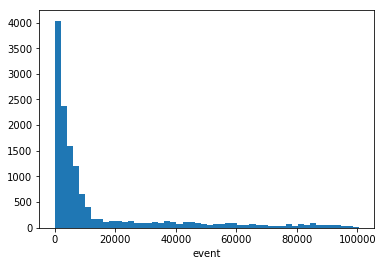

run


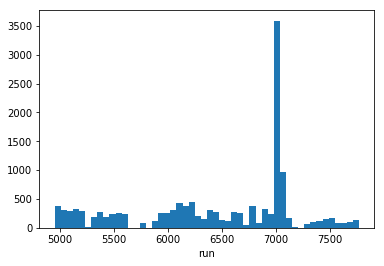

subrun


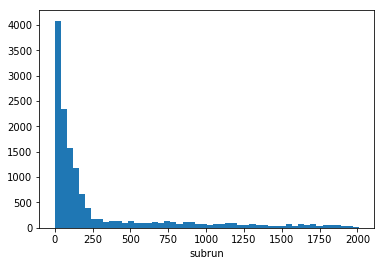

evt_time_sec


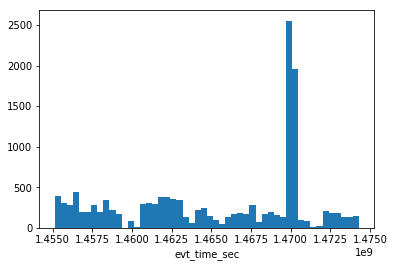

evt_time_nsec


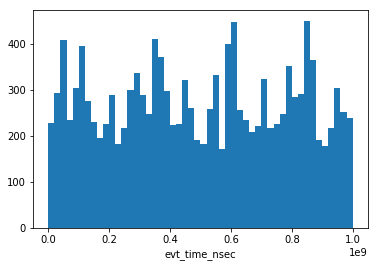

hitsU


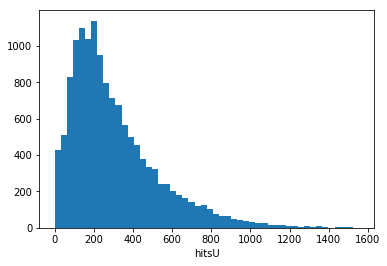

hitsV


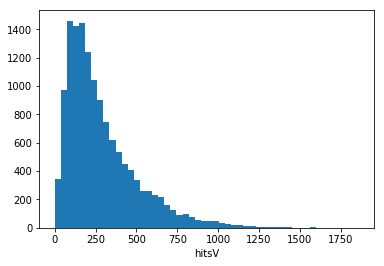

hitsY


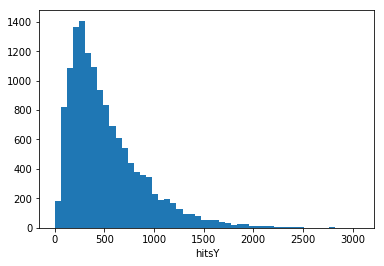

caloU


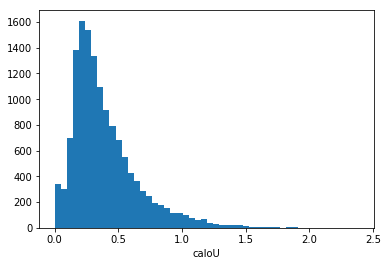

caloV


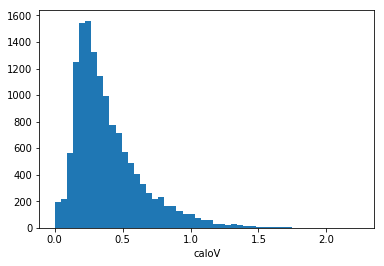

caloY


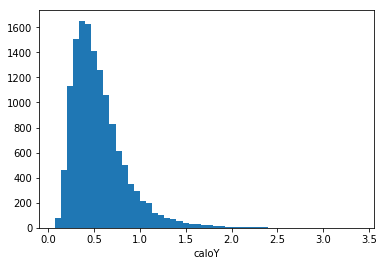

hitsSps


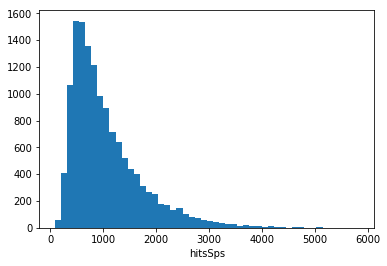

generation


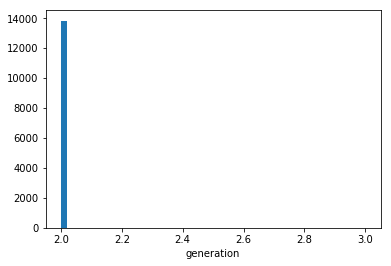

track_score


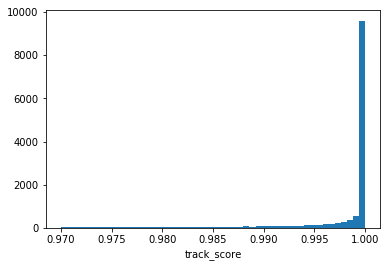

is_shower


/home/tmettler/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <type 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


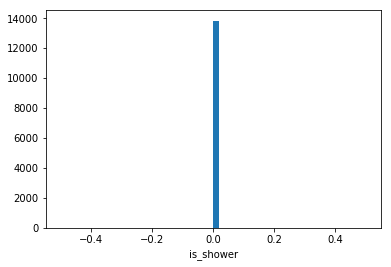

is_track


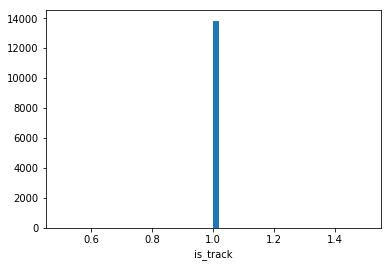

has_shower_daughter
is_track_daughter
vx


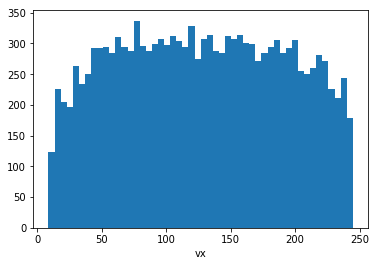

vy


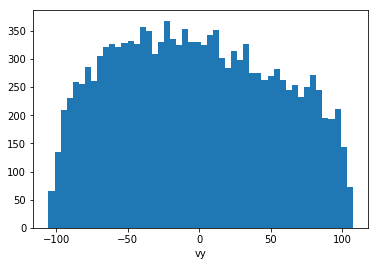

vz


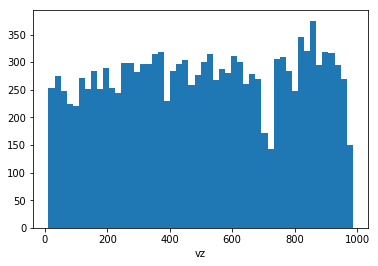

vtx_distance


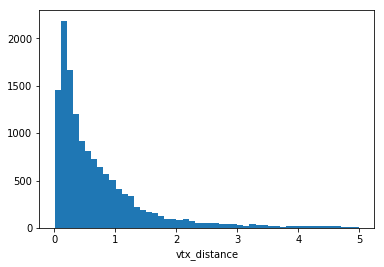

track_length


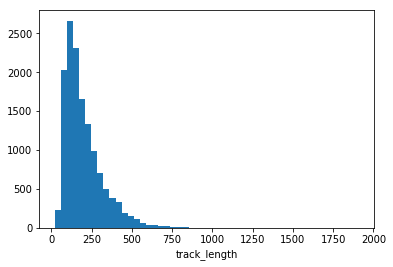

track_endx


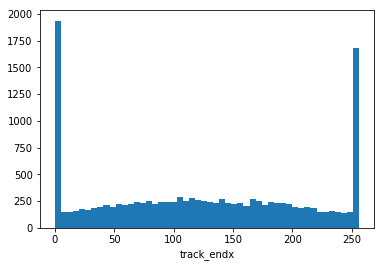

track_endy


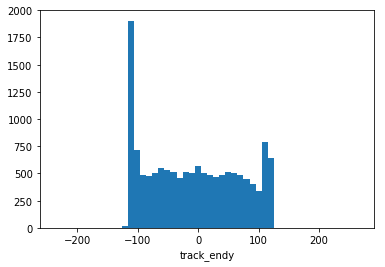

track_endz


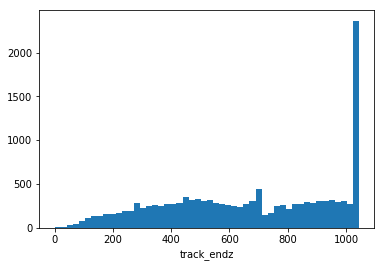

track_dirx


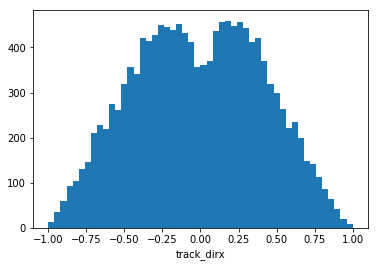

track_diry


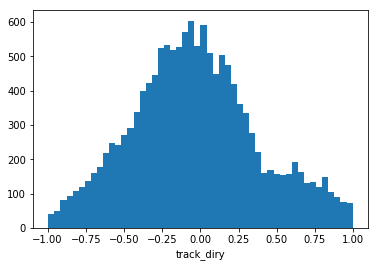

track_dirz


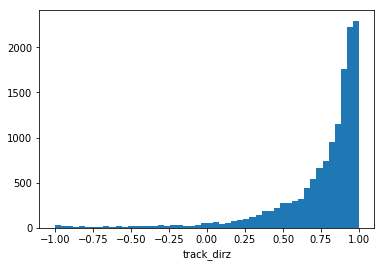

track_mcs_mom


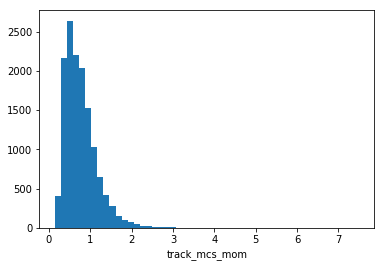

track_mcs_err
track_mcs_ll
track_chi2_proton


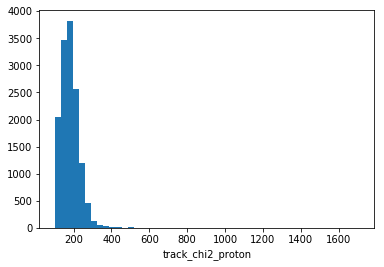

track_chi2_muon


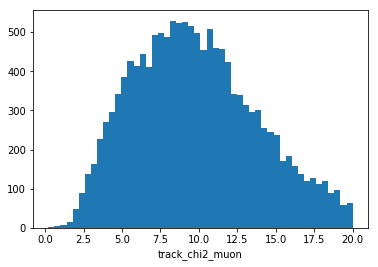

shower_length


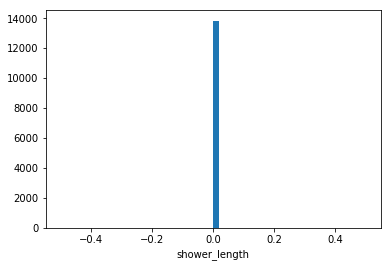

shower_openangle


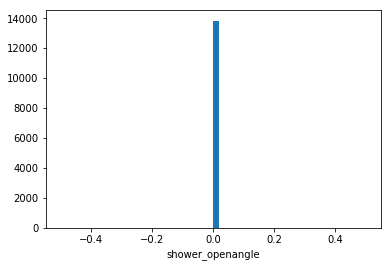

shower_dirx


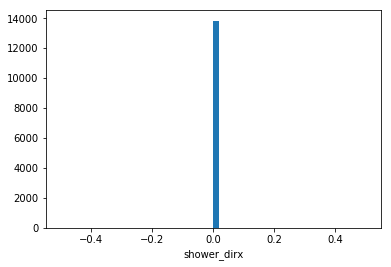

shower_diry


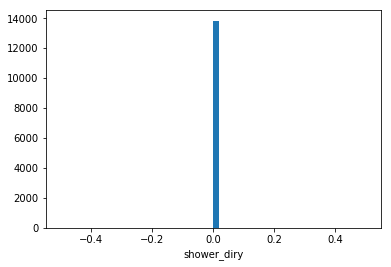

shower_dirz


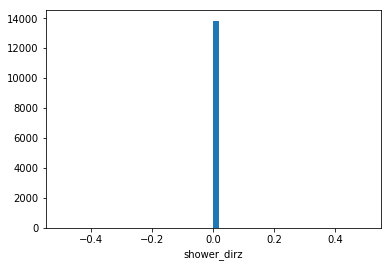

start_dedxU


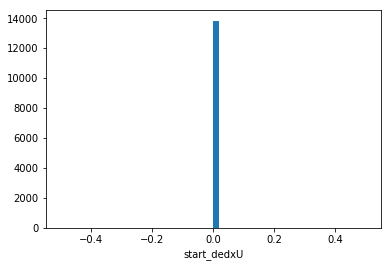

start_dedxV


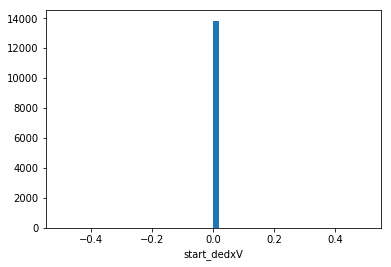

start_dedxY


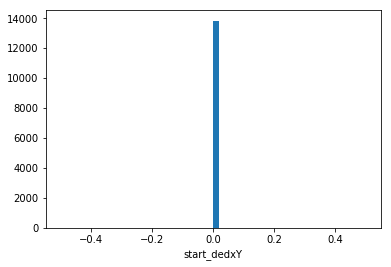

start_hitsU


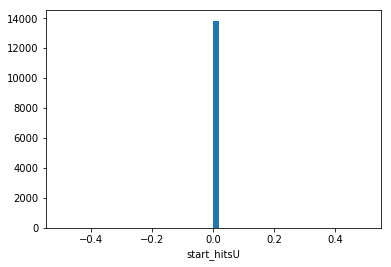

start_hitsV


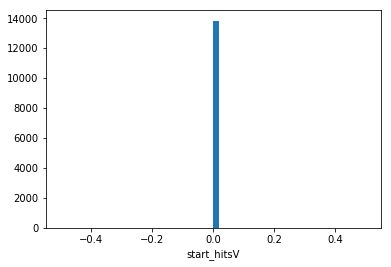

start_hitsY


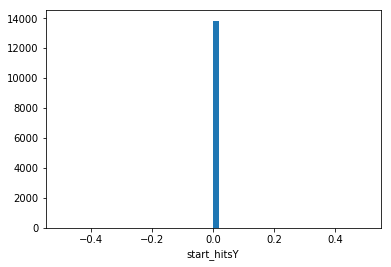

start_pitchU


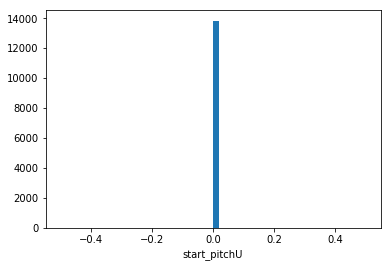

start_pitchV


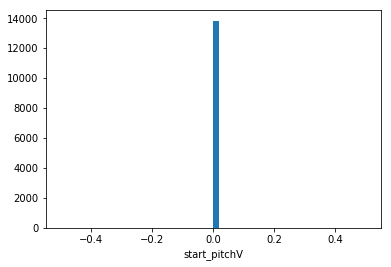

start_pitchY


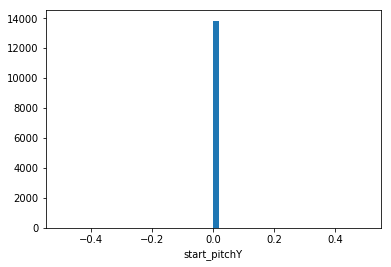

mc_neutrino


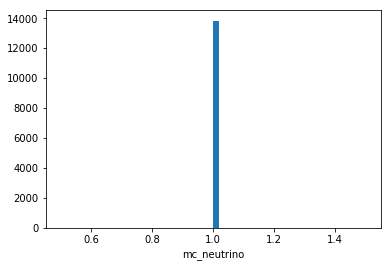

mc_vx


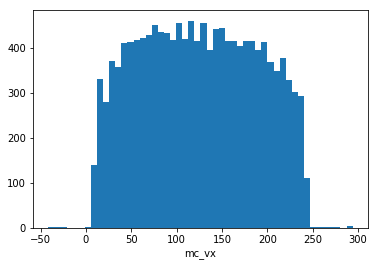

mc_vy


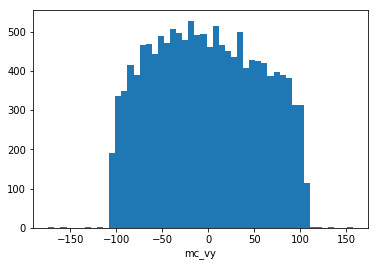

mc_vz


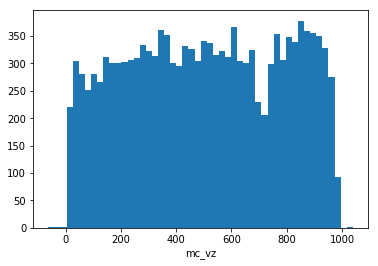

mc_vx_sce


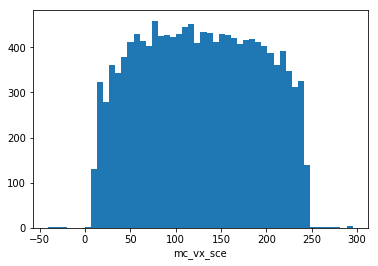

mc_vy_sce


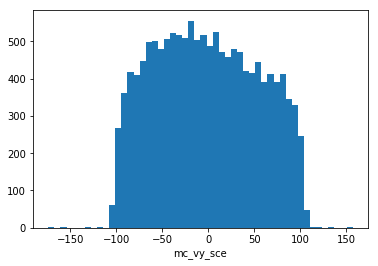

mc_vz_sce


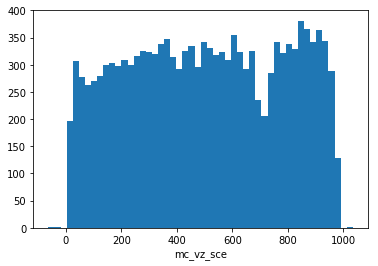

mc_length


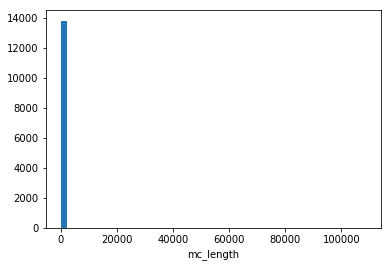

mc_energy


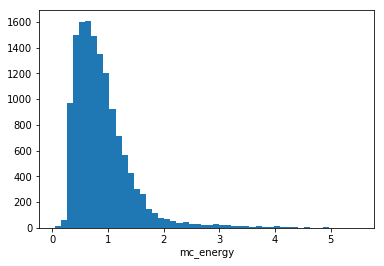

mc_pdg


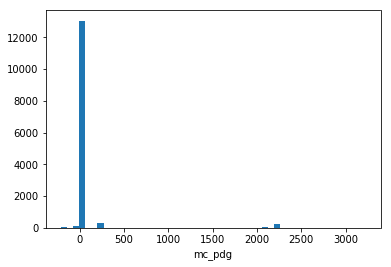

hash


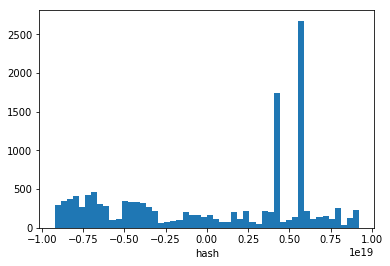

nu_pdg


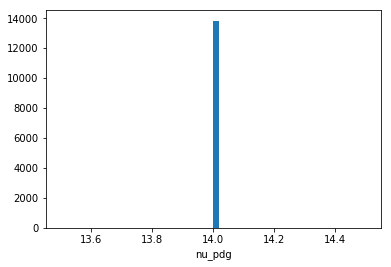

num_tracks


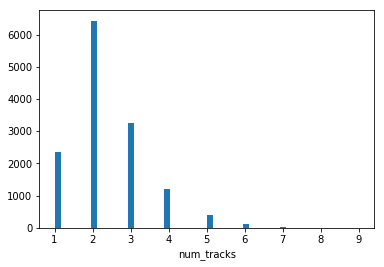

nu_sig_mask


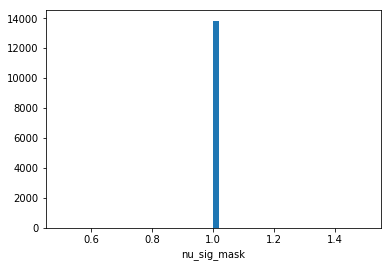

topologicalScore


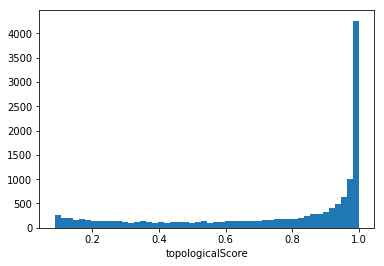

flashMatchScore


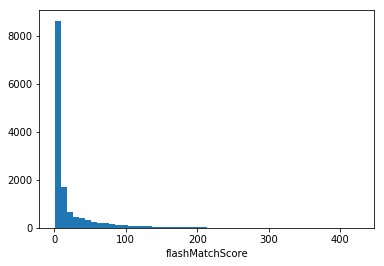

minCRTdist


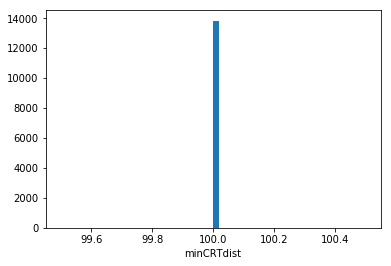

longest_track_length


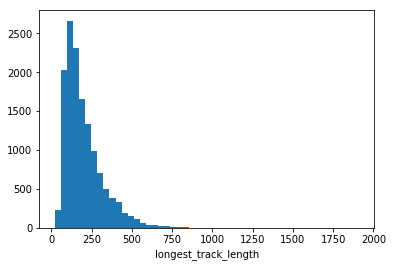

muon_candidate


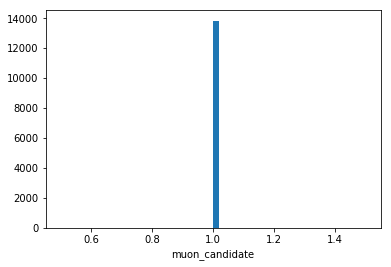

all_muon_candidate


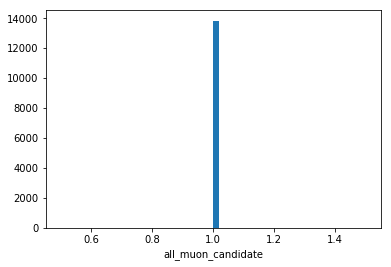

bestCosmicMatch


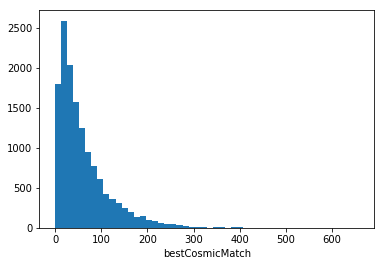

mc_nu_in_tpc


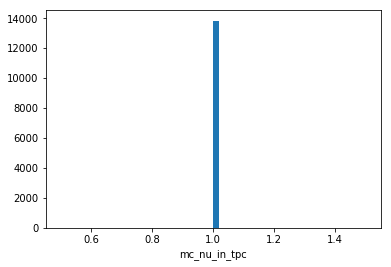

mc_nu_cc_sig


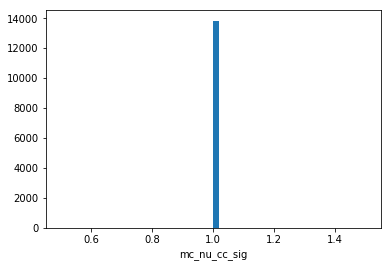

mc_nu_lepton_energy


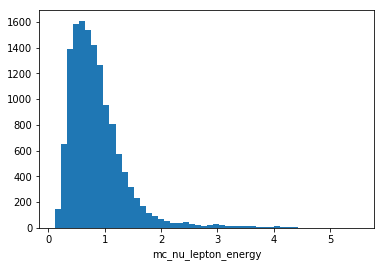

mc_nu_lepton_theta


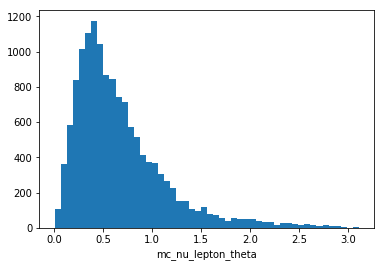

mc_nu_lepton_px


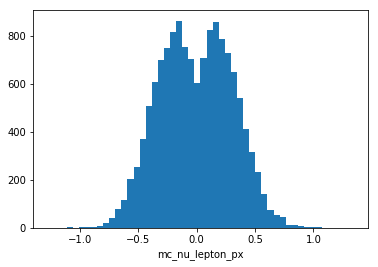

mc_nu_lepton_py


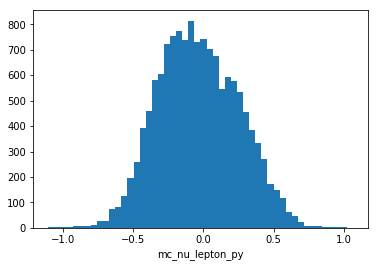

mc_nu_lepton_pz


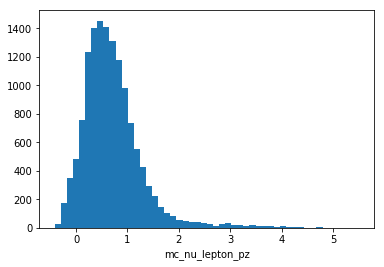

mc_nu_vx


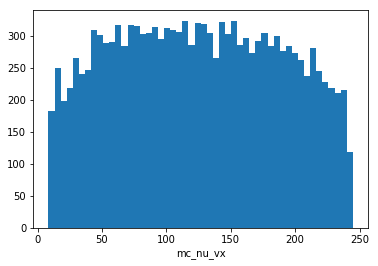

mc_nu_vy


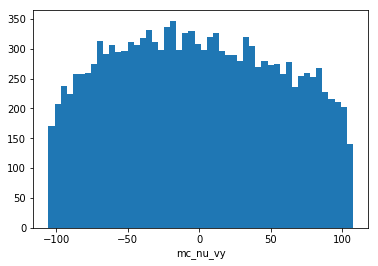

mc_nu_vz


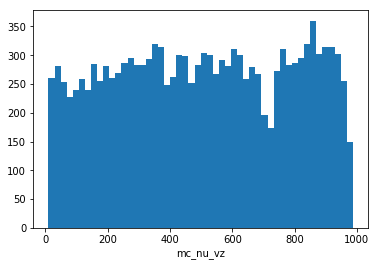

start_contained


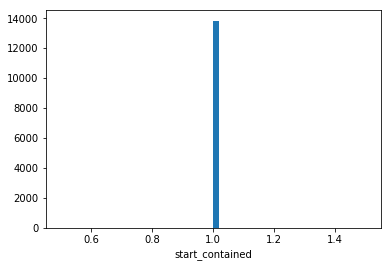

In [20]:
for key in tree_Daughter_nuCC.columns: 
    print key
    if (key!='has_shower_daughter' and key!='is_track_daughter' and key!='track_mcs_err' and key!='track_mcs_ll') :
        plt.hist(tree_Daughter_nuCC.query(query_event)[key.decode("utf-8")], bins=50)
        plt.xlabel(key.decode("utf-8"))
        plt.show()